In [1]:
%cd ..

C:\Users\susanne\git\binarybeech


In [2]:
import pandas as pd

In [3]:

df = pd.read_csv("data/titanic_kaggle.csv")
df_titanic = df.sample(frac=0.75)
df_test = df.loc[df.index.difference(df_titanic),:]
    

In [4]:

from binarybeech.binarybeech import *
import binarybeech.utils as utils


In [5]:

import logging
logging.basicConfig(level=logging.INFO)


In [6]:

rf_titanic = RandomForest(df_titanic.copy(),"Survived", cart_settings={"max_depth":4,"min_leaf_samples":2, "min_split_samples":2},sample_frac=0.3,n_attributes=5,metrics_type="classification"
                                 )

In [7]:

rf_titanic.train(20)


A tree with 15 leafs was created
A tree with 14 leafs was created
A tree with 11 leafs was created
A tree with 11 leafs was created
A tree with 7 leafs was created
A tree with 11 leafs was created
A tree with 9 leafs was created
A tree with 11 leafs was created
A tree with 10 leafs was created
A tree with 14 leafs was created
A tree with 13 leafs was created
A tree with 14 leafs was created
A tree with 13 leafs was created
A tree with 14 leafs was created
A tree with 13 leafs was created
A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 14 leafs was created
A tree with 11 leafs was created
A tree with 16 leafs was created


In [8]:

rf_titanic.validate_oob()


{'precision': array([0.96462264, 0.49590164]),
 'recall': array([0.76879699, 0.88970588]),
 'F-score': 0.7462453204140058,
 'accuracy': 0.7934131736526946}

In [9]:

rf_titanic.validate()


{'precision': array([0.97641509, 0.54508197]),
 'recall': array([0.78857143, 0.93006993]),
 'F-score': 0.77991793347002,
 'accuracy': 0.8188622754491018}

In [10]:

rf_titanic.variable_importance()


{'Sex': 1.0,
 'Fare': 0.2712328767123289,
 'Age': 0.19452054794520543,
 'Pclass': 0.12876712328767118,
 'PassengerId': 0.12328767123287676,
 'SibSp': 0.043835616438356165,
 'Parch': 0.04383561643835612,
 'Embarked': 0.0273972602739726,
 'Name': 0.0,
 'Ticket': 0.0,
 'Cabin': 0.0}

In [11]:

import binarybeech.utils as bu
bu.print_bars(rf_titanic.variable_importance(),max_width=50)



Sex       |############################### 1.0
Fare      |########                       0.27
Age       |######                         0.19
Pclass    |####                           0.13
PassengerId|####                           0.12
SibSp     |#                              0.044
Parch     |#                              0.044
Embarked  |#                              0.027
Name      |                                0.0
Ticket    |                                0.0
Cabin     |                                0.0


In [12]:

rf_titanic.validate(df_test)


{'precision': array([0.97814208, 0.49707602]),
 'recall': array([0.7574048 , 0.93406593]),
 'F-score': 0.751295525431134,
 'accuracy': 0.7934904601571269}

In [13]:

gbt_titanic = GradientBoostedTree(df_titanic.copy(),"Survived", cart_settings={"max_depth":2,"min_leaf_samples":10, "min_split_samples":10},sample_frac=0.75,n_attributes=9
                                 )

In [14]:
gbt_titanic.X_names

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [15]:
it=gbt_titanic._initial_tree()

A tree with 1 leafs was created


In [16]:

utils.print_tree(it.tree)

0.3652694610778443



In [17]:
it.tree.root

In [18]:

gbt_titanic.learning_rate=0.01
#gbt_titanic.create_trees(200)


In [19]:

gbt_titanic.predict(df_titanic.iloc[[0]])

array([0.36526946])

In [20]:

gbt_titanic.validate(df_test)


C:\Users\susanne\git\binarybeech\binarybeech\metrics.py:86: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


{'precision': array([1., 0.]),
 'recall': array([0.61616162,        nan]),
 'F-score': nan,
 'accuracy': 0.6161616161616161}

#k-fold cross-validation

In [21]:

c = CART(df_titanic,"Survived",metrics_type="classification")


A tree with 107 leafs was created
A tree with 90 leafs was created
A tree with 89 leafs was created
A tree with 83 leafs was created
A tree with 104 leafs was created
A tree with 98 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.0030238038737611045


A tree with 107 leafs was created


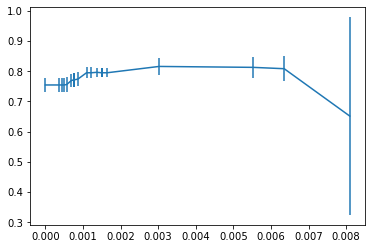

In [22]:
c.train(slack=1e-3)

In [23]:
c.tree.leaf_count()

7

In [24]:
utils.print_tree(c.tree)

Sex in ('female',)
├── False:0
└── True: Pclass<2.24
    ├── False:Fare<24.42
    │   ├── False:0
    │   └── True: Embarked in ('Q',)
    │       ├── False:Age<24.47
    │       │   ├── False:0
    │       │   └── True: 1
    │       └── True: PassengerId<468.66
    │           ├── False:0
    │           └── True: 1
    └── True: 1



In [25]:
c.validate(df_test)

{'precision': array([0.94717668, 0.60526316]),
 'recall': array([0.79389313, 0.87711864]),
 'F-score': 0.7900251755969145,
 'accuracy': 0.8159371492704826}